In [2]:
import SimpleITK as sitk
import numpy as np
import nibabel as nib
import os
import sklearn
import scipy
import matplotlib
#matplotlib.use('TkAgg')
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import hdbscan as hdbs
#import imageio
#import vispy
from scipy.spatial.distance import cdist
import seaborn as sns
import shutil
import pandas_ml as pdml
import time
import skbio
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.feature_extraction.image import grid_to_graph
import imutils
import cv2
#from PIL import Image
from pandas_ml import ConfusionMatrix
import seaborn as sns
import warnings
from coclust.evaluation.external import accuracy
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
%matplotlib inline
#sns.set_context('poster')
#sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [ ]:
#from nibabel.testing import data_path
#bratsflair = os.path.join(data_path, '/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Validation/Brats18_CBICA_AAM_1/Brats18_CBICA_AAM_1_flair.nii')

In [3]:
def myshow(img, title=None, margin=0.05, dpi=80 ):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    
    
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
            
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
   
    
    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)

In [4]:
idxSlice = 77
#idxSlice = 84
#Brats18_CBICA_AYA_1 (idxslice=57)(segslice=57)[HGG]
#Brats18_CBICA_AAB_1 (idxslice=87)(segslice=87)[HGG]
#Brats18_CBICA_AAG_1 (idxslice=74)(segslice=74)[HGG]
#Brats18_CBICA_AAL_1 (idxslice=82)(segslice=82)[HGG]
#Brats18_CBICA_AAP_1 (idxslice=77)(segslice=77)[HGG]
#Brats18_CBICA_ABB_1 (idxslice=91)(segslice=91)[HGG]
#Brats18_CBICA_ABE_1 (idxslice=79)(segslice=79)[HGG]
#Brats18_CBICA_ABO_1 (idxslice=93)(segslice=93)[HGG]
#Brats18_CBICA_ALU_1 (idxslice=71)(segslice=71)[HGG]
#Brats18_TCIA09_141_1 (idxslice=84)(segslice=84)[LGG] xx
#Brats18_TCIA09_254_1 (idxslice=76)(segslice=76)[LGG]
#Brats18_TCIA09_255_1 (idxslice=78)(segslice=74)[LGG]
#Brats18_TCIA09_312_1 (idxslice=85)(segslice=85)[LGG]
#Brats18_TCIA09_402_1 (idxslice=67)(segslice=67)[LGG]
#Brats18_TCIA09_428_1 (idxslice=83)(segslice=83)[LGG] 
#Brats18_TCIA09_451_1 (idxslice=84)(segslice=84)[LGG]
#Brats18_TCIA09_462_1 (idxslice=87)(segslice=87)[LGG]
#Brats18_TCIA09_493_1 (idxslice=81)(segslice=81)[LGG]
#Brats18_TCIA09_620_1 (idxslice=81)(segslice=81)[LGG]
#Brats18_TCIA09_109_1 (idxslice=84)(segslice=84)[LGG]

In [ ]:
#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/11_no.jpg", cv2.IMREAD_GRAYSCALE)
#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/7_no.jpg", cv2.IMREAD_GRAYSCALE)
#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/9_no.jpg", cv2.IMREAD_GRAYSCALE)
#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/42_no.jpg", cv2.IMREAD_GRAYSCALE)
#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/17_no.jpg", cv2.IMREAD_GRAYSCALE)
#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/22_no.jpg", cv2.IMREAD_GRAYSCALE)
#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/27_no.jpg", cv2.IMREAD_GRAYSCALE)
#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/29_no.jpg", cv2.IMREAD_GRAYSCALE)
normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/34_no.jpg", cv2.IMREAD_GRAYSCALE)
#plt.imshow(normaltest)

#normaltest = cv2.imread("/home/omar/Documents/thesis-datasets/brain-mri-images-for-brain-tumor-detection/no/21_no.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(normaltest,cmap=plt.cm.gray)
#plt.savefig("/home/omar/Documents/Results/normalbrain/normalbrain_42.jpg")

In [ ]:
ig = plt.figure()
plt.hist(normaltest.flatten(), bins=100)
plt.title('Tumor histogram prior to clustering')
plt.show()
#fig.savefig("/home/omar/Documents/Tumorhisto.jpg")

In [ ]:
pixel = normaltest[0,0]
print (pixel)

In [ ]:
# biasfieldcorrection requires a mask we used otsu to create a mask and cast the whole image into float32.
sitk_flair = sitk.GetImageFromArray(normaltest)
img_masknorm = sitk.OtsuThreshold(sitk_flair)
imgcasnorm = sitk.Cast(sitk_flair, sitk.sitkFloat32)
correctornorm = sitk.N4BiasFieldCorrectionImageFilter()
img_cnorm = correctornorm.Execute(imgcasnorm, img_masknorm)
myshow(img_cnorm)

In [ ]:
#smooth/denoising image
Smoothnormalimg = sitk.CurvatureFlow(image1=img_cnorm,timeStep=0.125,numberOfIterations=5)
myshow(Smoothnormalimg)
#Smoothcast = sitk.Cast(Smoothimg,sitk.sitkUInt8)
#Smoothcast.dtype
#Smootharray = sitk.GetArrayFromImage(Smoothimg)
#Smoothimg.dtype

In [ ]:
img_rescale = sitk.Cast(sitk.RescaleIntensity(Smoothnormalimg), sitk.sitkUInt16)
fl_resnorm = sitk.GetArrayFromImage(img_rescale)
fl_resnorm

In [ ]:
ig = plt.figure()
plt.hist(fl_resnorm.flatten(), bins=100)
plt.title('Tumor histogram prior to clustering')
plt.show()
#fig.savefig("/home/omar/Documents/Tumorhisto.jpg")

In [ ]:
normaltest.shape

In [ ]:
#plt.imshow(normaltest)

In [ ]:
ig = plt.figure()
plt.hist(fl_resnorm.flatten(), bins=100)
plt.title('Normal brain histogram')
plt.show()
#ig.savefig("/home/omar/Documents/Results/normalbrain/Normalbrainhisto_42.jpg")

In [ ]:
masknorm = fl_resnorm

In [ ]:
#maskfig = plt.figure()
mask = masknorm > 150
masknorm[mask]=255
plt.clf()
plt.cla()
plt.close()
maskfig = plt.figure()
plt.imshow(masknorm,cmap=plt.cm.gray)
#plt.savefig("/home/omar/Documents/Results/normalbrain/maskednormal200_42.jpg")
#maskfig.clf()
#plt.cla()
#plt.close()


In [ ]:
moment = cv2.moments(masknorm)
X = int(moment["m10"] / moment["m00"])
Y = int(moment["m01"] / moment["m00"])

cv2.circle(masknorm,(X,Y),15,(0,255,0),3)

plt.imshow(masknorm,'gray')
cv2.waitKey(0)

In [ ]:
normaltest.max()

In [ ]:
#masknorm

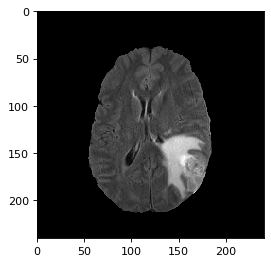

In [5]:
#HGG
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AYA_1/Brats18_CBICA_AYA_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AAB_1/Brats18_CBICA_AAB_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AAG_1/Brats18_CBICA_AAG_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AAL_1/Brats18_CBICA_AAL_1_flair.nii.gz')
strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AAP_1/Brats18_CBICA_AAP_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABB_1/Brats18_CBICA_ABB_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABE_1/Brats18_CBICA_ABE_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABO_1/Brats18_CBICA_ABO_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ALU_1/Brats18_CBICA_ALU_1_flair.nii.gz')
#LGG
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA10_109_1/Brats18_TCIA10_109_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_254_1/Brats18_TCIA09_254_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_255_1/Brats18_TCIA09_255_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_312_1/Brats18_TCIA09_312_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_402_1/Brats18_TCIA09_402_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_428_1/Brats18_TCIA09_428_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_451_1/Brats18_TCIA09_451_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_462_1/Brats18_TCIA09_462_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_493_1/Brats18_TCIA09_493_1_flair.nii.gz')
#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_620_1/Brats18_TCIA09_620_1_flair.nii.gz')

#strtest = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_BHM_1/Brats18_CBICA_BHM_1_flair.nii.gz')
strtest = strtest[:,:,idxSlice]
strarr = sitk.GetArrayFromImage(strtest)
strarr.shape
myshow(strtest)

In [ ]:
ig = plt.figure()
plt.hist(strarr.flatten(), bins=100)
plt.title('Original Tumor histogram before preproc')
plt.show()
#fig.savefig("/home/omar/Documents/Tumorhisto.jpg")

In [ ]:
#t1 = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_BHM_1/Brats18_CBICA_BHM_1_t1.nii.gz')
#myshow(t1)

In [ ]:
#t1ce = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_BHM_1/Brats18_CBICA_BHM_1_t1ce.nii.gz')
#myshow(t1ce)

In [ ]:
#t2 = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_BHM_1/Brats18_CBICA_BHM_1_t2.nii.gz')
#myshow(t2)

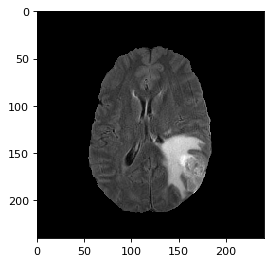

In [6]:
# biasfieldcorrection requires a mask we used otsu to create a mask and cast the whole image into float32.
img_mask = sitk.OtsuThreshold(strtest)
imgcas = sitk.Cast(strtest, sitk.sitkFloat32)
corrector = sitk.N4BiasFieldCorrectionImageFilter()
img_c = corrector.Execute(imgcas, img_mask)
#sitk_show(img_c)
myshow(img_c)

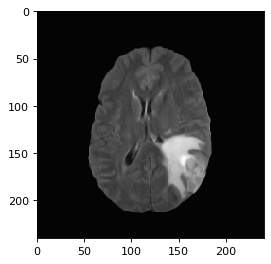

In [7]:
#smooth/denoising image
Smoothtumorimg = sitk.CurvatureFlow(image1=img_c,timeStep=0.125,numberOfIterations=5)
myshow(Smoothtumorimg)
#Smoothimg.dtype
#Smoothcast = sitk.Cast(Smoothimg,sitk.sitkUInt8)
#Smoothcast.dtype
#Smootharray = sitk.GetArrayFromImage(Smoothimg)

In [8]:
#img_rescale = sitk.Cast(sitk.RescaleIntensity(brats_flair), sitk.sitkFloat32)
img_rescale = sitk.Cast(sitk.RescaleIntensity(Smoothtumorimg), sitk.sitkUInt16)
fl_res= sitk.GetArrayFromImage(img_rescale)
fl_res.shape

(240, 240)

In [ ]:
rig = plt.figure()
plt.hist(fl_res.flatten(), bins=100)
plt.title('Tumor histogram after preproc')
plt.show()
#fig.savefig("/home/omar/Documents/Tumorhisto.jpg")

In [ ]:
#difference = (fl_res == fl_resnorm).all()

In [ ]:
ig = plt.figure()
plt.hist(strarr.flatten(), bins=100)
plt.title('Tumor histogram prior to clustering')
plt.show()
#fig.savefig("/home/omar/Documents/Tumorhisto.jpg")

In [ ]:
#HGG
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AYA_1/Brats18_CBICA_AYA_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AAB_1/Brats18_CBICA_AAB_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AAG_1/Brats18_CBICA_AAG_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AAL_1/Brats18_CBICA_AAL_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AAP_1/Brats18_CBICA_AAP_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABB_1/Brats18_CBICA_ABB_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABE_1/Brats18_CBICA_ABE_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ABO_1/Brats18_CBICA_ABO_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_ALU_1/Brats18_CBICA_ALU_1_seg.nii.gz')
#LGG
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA10_109_1/Brats18_TCIA10_109_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_254_1/Brats18_TCIA09_254_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_255_1/Brats18_TCIA09_255_1_seg.nii.gz')
segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_312_1/Brats18_TCIA09_312_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_402_1/Brats18_TCIA09_402_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_428_1/Brats18_TCIA09_428_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_451_1/Brats18_TCIA09_451_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_462_1/Brats18_TCIA09_462_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_493_1/Brats18_TCIA09_493_1_seg.nii.gz')
#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/LGG/Brats18_TCIA09_620_1/Brats18_TCIA09_620_1_seg.nii.gz')


#segres = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_BHM_1/Brats18_CBICA_BHM_1_seg.nii.gz')
segres = segres[:,:,idxSlice]
segarr = sitk.GetArrayFromImage(segres)
segarreshap = segarr.flatten()
myshow(segres)

In [ ]:
#impre = imageio.imread('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_BHM_1/outputflair/image-slice077.jpg')
#plt.imshow(impre)

In [ ]:
#test with rgb image
#im = imageio.imread('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Validation/Brats18_CBICA_AAM_1/out/image-slice100.jpg')
#im = imageio.imread('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Validation/Brats18_CBICA_AAM_1/Brats18_CBICA_AAM_1_flair.nii')
#im = imageio.imread('/home/omar/Documents/thesis-datasets/Axialviewsfind/2-AX FLAIR-21408/slice-slice007.jpg')
#imseg = imageio.imread('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_BHM_1/out/image-slice077.jpg')
#im = im[idxSlice,:,:]
##imbrats = sitk.ReadImage('/home/omar/Documents/thesis-datasets/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_BHM_1/outputflair/image-slice077.jpg')
##imbratarr = sitk.GetArrayFromImage(imbrats)
##plt.imshow(imbrats)
##imbrats.shape
#myshow(imbrats)

In [ ]:
ig = plt.figure()
plt.hist(fl_res.flatten(), bins=100)
plt.title('Tumor histogram prior to clustering')
plt.show()

In [9]:
#convert into columns of color
MAX_NUM_SAMPLES = int(os.environ.get('MAX_NUM_SAMPLES', 5000))
image_cols = fl_res.reshape(-1,3)
#image_cols = strarr.reshape(-1,3)
#image_cols = normaltest.reshape(-1,3)
#image_cols = fl_resnorm.reshape(-1,3)
subsample_image_cols = image_cols.copy()
# TODO this can be optimised if needed
np.random.shuffle(subsample_image_cols)
subsample_image_cols = subsample_image_cols[:MAX_NUM_SAMPLES, :]

In [10]:
image_cols.shape


(19200, 3)

In [ ]:
image_colsres = image_cols.reshape(fl_res.shape)
image_colsres.shape

In [ ]:
image_cols

In [ ]:
#thresholding using opencv2
#hdbreread= sitk.GetImageFromArray(fl_resnorm)
#img = cv2.medianBlur(fl_resnorm,5).astype('uint8')
#img = cv2.medianBlur(fl_res,5).astype('uint8')
#img = cv2.medianBlur(segmented_image,5).astype('uint8')
#img = cv2.medianBlur(dbsegmented_image,5).astype('uint8')
img = cv2.medianBlur(image_colsres,5).astype('uint8')
#img = segmented_image.astype('uint8')
#global thresh 160

threshval = 150
th1 = cv2.threshold(img,threshval,255,cv2.THRESH_BINARY)[1]


#adaptive thresh
#th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
#            cv2.THRESH_BINARY,11,2)
#adaptive gaussian
#th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            cv2.THRESH_BINARY,11,2)

#titles = ['Original Image', 'Global Thresholding (v = 127)',
#            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
#images = [img, th1, th2, th3]

#for i in range(4):
#    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
#    plt.title(titles[i])
#    plt.xticks([]),plt.yticks([])
plt.title('Threshold prior to hdbscan')
plt.xticks([]),plt.yticks([])
plt.imshow(th1,'gray')


In [ ]:
th1flatt = th1.flatten()

In [ ]:
th1res = th1.reshape(-1,3)

In [ ]:
#with open('/home/omar/Desktop/cminitialtumorhdbscan','w') as f:
cmth = ConfusionMatrix(segarreshap,th1flatt)
print(cmth.print_stats())
#print(cm.print_stats(),file=f)
#if th1.all() == masknorm.all():
#   print('ventricles are highlighted')

In [ ]:
# Group similar grey levels using 8 clusters
kmeanstime = time.time()
X = image_cols.reshape(-1,1)
#X = image_cols
k_m = cluster.KMeans(n_clusters=5, n_init= 30)

km_predict=k_m.fit(X)
kmeans_elapsed_time = time.time() - kmeanstime
    
values = k_m.cluster_centers_.squeeze()
labels = k_m.labels_

#values, labels = km_clust(img_array, n_clusters = 3)

# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape= fl_res.shape

In [ ]:
img_segm

In [ ]:
segarreshap

In [ ]:
#flatten segmented image for metrics
img_segmflat = img_segm.flatten().astype(np.uint8)
#print(img_segmflat)

vmin = image_cols.min()
vmax = image_cols.max()

In [ ]:
fig = plt.figure(1)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(fl_res,cmap=plt.cm.gray,vmin=vmin,vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segm,cmap=plt.cm.gray,vmin=vmin, vmax=vmax)
ax2.set_title('Simplified levels')
#plt.savefig("/home/omar/Documents/kmeanseg.jpg")

# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])


plt.show()

In [ ]:
#Kmeans results
print('\n\n++ Kmeans Results')
#print('Number of clusters: ', number_of_clusters)
#print('Numer of iterations: ' % n_init) # number of iterations to run with different centroid seeds.
print('Elapsed time to cluster: %.4f s'% kmeans_elapsed_time)
print('F1score: ', metrics.f1_score(segarreshap, img_segmflat, average='weighted'))
print('Accuracy score: ' ,metrics.accuracy_score(segarreshap,img_segmflat)) #sklearn accuracy
print('Accuracy score: ' ,accuracy(segarreshap,img_segmflat))
print('Homogeneity score: ', metrics.homogeneity_score(segarreshap,img_segmflat))
print('Rand score: ' , metrics.adjusted_rand_score(segarreshap,img_segmflat))
print('VMeasure: ' , metrics.v_measure_score(segarreshap,img_segmflat))
print('Normalized mutual info score: ', metrics.normalized_mutual_info_score(segarreshap,img_segmflat))

In [ ]:
#DBscan
from sklearn.cluster import DBSCAN
dbtime=time.time()
db = DBSCAN(eps=10, min_samples=20,metric='euclidean')
dbf = db.fit(image_cols)
db_elapsed_time = time.time() - dbtime
core_samples_mask = np.zeros_like(dbf.labels_, dtype=bool)
core_samples_mask[dbf.core_sample_indices_] = True
dblabels = dbf.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

In [ ]:
n_noise_

In [ ]:
#dblabels.astype(np.int32)

In [ ]:
number_of_clusters = np.max(db.labels_) + 1

In [ ]:
n_clusters_

In [ ]:
centers = np.zeros((number_of_clusters, 3))

for i in range(0, number_of_clusters):
    cluster_points = image_cols[dblabels == i]
    cluster_mean = np.mean(cluster_points, axis=0)
    centers[i, :] = cluster_mean

In [ ]:
centers

In [ ]:
point_distances = cdist(centers,image_cols,'euclidean')
cluster_indexes = np.argmin(point_distances, axis=0)
segmented = centers[cluster_indexes]

In [ ]:
#segmented = segmented.astype(np.float32)
segmented_image = segmented.reshape(normaltest.shape).astype(np.uint8)
segmented_image.shape
#mask = segmented_image > 180
#segmented_image[mask]=255

In [ ]:
dblabels.shape

In [ ]:
#test= sitk.GetImageFromArray(segmented_image)
#plt.grid(None)
plt.imshow(segmented_image,interpolation="nearest",cmap=plt.cm.gray)
plt.colorbar()
plt.savefig("/home/omar/Documents/Results/normalbrain/normalbraindbscan.jpg")

In [ ]:
dbscanflat = segmented_image.flatten()

In [ ]:
#dbscan results
print('\n\n++ DBscan Results')
print('Number of clusters: ', number_of_clusters)
#print('Numer of iterations: ' % n_init) # number of iterations to run with different centroid seeds.
print('Elapsed time to cluster: %.4f s'% db_elapsed_time)
print('F1score: ', metrics.f1_score(segarreshap, dbscanflat, average='weighted'))
print('Accuracy score: ' ,metrics.accuracy_score(segarreshap,dbscanflat))
print('Accuracy score: ' ,accuracy(segarreshap,img_segmflat))
print('Homogeneity score: ', metrics.homogeneity_score(segarreshap,dbscanflat))
print('Rand score: ' , metrics.adjusted_rand_score(segarreshap,dbscanflat))
print('VMeasure: ' , metrics.v_measure_score(segarreshap,dbscanflat))
print('Normalized mutual info score: ', metrics.normalized_mutual_info_score(segarreshap,dbscanflat))

print('\n\n++ DBscan Internal Indices Results')
print('Calinski harabasz score: ',metrics.calinski_harabasz_score(image_cols, dblabels))
print('Silhouette score: ' ,metrics.silhouette_score(image_cols,dblabels))
print('Davies-Bouldin score: ',metrics.davies_bouldin_score(image_cols,dblabels))


In [ ]:
plt.figure()
plt.hist(segmented_image.flatten(), bins=100)
plt.title('Histogram after dbscan')
plt.show()

In [ ]:
unique_labels = set(dblabels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dblabels == k)

    xy = image_cols[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = image_cols[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
segmented.dtype

In [ ]:
#image_colsv = image_cols.reshape(-1,2)
#image_colsv.shape

In [ ]:
#hdbscan
hdbtime=time.time()
hdscan = hdbs.HDBSCAN(min_cluster_size = 30, min_samples=None,gen_min_span_tree=True,approx_min_span_tree=True) #,metric='dice') #.fit(img_arrayint)
hdscan.fit(image_cols)
#hdscan.fit(th1res)
hdb_elapsed_time = time.time() - hdbtime
r = hdscan.labels_
db_n_noise_ = list(r).count(-1)

In [ ]:
#hdscan.minimum_spanning_tree_.plot(edge_cmap='viridis',edge_alpha=0.6,node_size=10,edge_linewidth=2)

In [ ]:
#hdscan.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
hdscan.condensed_tree_.plot(cmap='viridis',select_clusters=True, selection_palette=sns.color_palette())

In [ ]:
dbnumber_of_clusters = np.max(r) + 1
db_n_noise_

In [ ]:
#0-26
#hdscan.labels_.max()


In [ ]:
#hdscan.exemplars_
hdscan.relative_validity_

In [ ]:
dbnumber_of_clusters

In [ ]:
dbcenters = np.zeros((dbnumber_of_clusters, 3))

for i in range(0, dbnumber_of_clusters):
    dbcluster_points = image_cols[r == i]
    #dbcluster_points = th1res[r == i]
    dbcluster_mean = np.mean(dbcluster_points, axis=0)
    dbcenters[i, :] = dbcluster_mean



In [ ]:
dbcenters

In [ ]:
dbcenters.shape

In [ ]:
dbpoint_distances = cdist(dbcenters,image_cols,'euclidean')
#dbpoint_distances = cdist(dbcenters,th1res,'euclidean')
dbcluster_indexes = np.argmin(dbpoint_distances, axis=0)
dbsegmented = dbcenters[dbcluster_indexes]

In [ ]:
dbsegmented.shape
dbsegmented_image = dbsegmented.reshape(fl_res.shape).astype(np.uint8)

In [ ]:
plt.imshow(dbsegmented_image,interpolation="nearest",cmap=plt.cm.gray)
#plt.grid(None)
plt.title('Reconstructed image after HDBscan')
plt.colorbar()
#plt.savefig("/home/omar/Documents/Results/normalbrain/normalbrainhdbscan.jpg")

In [ ]:
dbsegmented_image.shape

In [ ]:
plt.figure()
histvals = plt.hist(dbsegmented_image.flatten(), bins=100)
plt.title('Histogram after hdbscan')
plt.show()

In [ ]:
dbflat=dbsegmented_image.flatten()
from sklearn.metrics import confusion_matrix

In [ ]:
from pandas_ml import ConfusionMatrix
#with open('/home/omar/Desktop/cminitialtumorhdbscan','w') as f:
cm = ConfusionMatrix(segarreshap,dbflat)
print(cm.print_stats())
#print(cm.print_stats(),file=f)

In [ ]:
#hdbscan results
print('\n\n++ Hdbscan Results')
print('Number of clusters: ', dbnumber_of_clusters)
#print('Numer of iterations: ' % n_init) # number of iterations to run with different centroid seeds.
print('Elapsed time to cluster: %.4f s'% hdb_elapsed_time)
print('F1score: ', metrics.f1_score(segarreshap, dbflat, average = 'weighted'))
print('Accuracy score: ', metrics.accuracy_score(segarreshap,dbflat))
print('Accuracy score: ' ,accuracy(segarreshap,img_segmflat))
print('Homogeneity score: ', metrics.homogeneity_score(segarreshap,dbflat))
print('Rand score: ' , metrics.adjusted_rand_score(segarreshap,dbflat))
print('VMeasure: ' , metrics.v_measure_score(segarreshap,dbflat))
print('Normalized mutual info score: ', metrics.normalized_mutual_info_score(segarreshap,dbflat))

print('\n\n++ Hdbscan Internal Indices Results')
print('Calinski harabasz score: ',metrics.calinski_harabasz_score(image_cols, r))
print('Silhouette score: ' ,metrics.silhouette_score(image_cols,r))
print('Davies-Bouldin score: ',metrics.davies_bouldin_score(image_cols,r))

#print(classification_report(segarreshap,dbflat,labels=r))
print (confusion_matrix(segarreshap,dbflat))

In [ ]:
#hierarchial clustering (agglomerative ward)
from sklearn.cluster import AgglomerativeClustering
agglotime=time.time()
#connectivity = grid_to_graph(*image_cols.shape[:2])
warclus = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
agglopredict = warclus.fit(image_cols)
agglo_elapsed_time = time.time() - agglotime
wardlab = warclus.labels_

In [ ]:
agglonumber_of_clusters = len(np.unique(warclus.labels_))

In [ ]:
agglonumber_of_clusters

In [ ]:
agglocenters = np.zeros((agglonumber_of_clusters, 3))

for i in range(0, agglonumber_of_clusters):
    agglocluster_points = image_cols[wardlab == i]
    agglocluster_mean = np.mean(agglocluster_points, axis=0)
    agglocenters[i, :] = agglocluster_mean

In [ ]:
agglosegmented = agglocenters[wardlab]
agglosegmented_image = agglosegmented.reshape(normaltest.shape).astype(np.uint8)
plt.imshow(agglosegmented_image, cmap=plt.cm.gray)
plt.colorbar()
plt.savefig("/home/omar/Documents/Results/normalbrain/normalbrainaggloscan.jpg")

In [ ]:
aggloflat = agglosegmented_image.flatten()

In [ ]:
#agglo results
print('\n\n++ Agglo Results')
print('Number of clusters: ', agglonumber_of_clusters)
#print('Numer of iterations: ' % n_init) # number of iterations to run with different centroid seeds.
print('Elapsed time to cluster: %.4f s'% agglo_elapsed_time)
print('F1score: ', metrics.f1_score(segarreshap, aggloflat, average = 'weighted'))
print('Accuracy score: ', metrics.accuracy_score(segarreshap,aggloflat))
print('Accuracy score: ' ,accuracy(segarreshap,aggloflat))
print('Homogeneity score: ', metrics.homogeneity_score(segarreshap,aggloflat))
print('Rand score: ' , metrics.adjusted_rand_score(segarreshap,aggloflat))
print('VMeasure: ' , metrics.v_measure_score(segarreshap,aggloflat))
print('Normalized mutual info score: ', metrics.normalized_mutual_info_score(segarreshap,aggloflat))

print('\n\n++ Agglo Internal Indices Results')
print('Calinski harabasz score: ',metrics.calinski_harabasz_score(image_cols, warclus.labels_))
print('Silhouette score: ' ,metrics.silhouette_score(image_cols,warclus.labels_))
print('Davies-Bouldin score: ',metrics.davies_bouldin_score(image_cols,warclus.labels_))


In [ ]:
plt.figure()
plt.hist(agglosegmented_image, bins=100)
plt.title('Histogram after agglomerative clustering')
plt.show()

In [ ]:
#Mean shift
from sklearn.cluster import estimate_bandwidth,MeanShift
bandwidth = estimate_bandwidth(image_cols, quantile=0.7, n_samples=None)
print (bandwidth)
meantime=time.time()
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, min_bin_freq=1, cluster_all=False)
ms.fit(image_cols)
mean_elapsed_time = time.time() - meantime
meannumber_of_clusters = len(np.unique(ms.labels_))

In [ ]:
ms_centers = ms.cluster_centers_
ms_labels = ms.labels_

In [ ]:
mssegmented = ms_centers[ms_labels]
mssegmented_image = mssegmented.reshape(normaltest.shape).astype(np.uint8)
plt.imshow(mssegmented_image, cmap=plt.cm.gray)
plt.colorbar()
plt.savefig("/home/omar/Documents/Results/normalbrain/normalbrainmeanshift.jpg")

In [ ]:
msflat = mssegmented_image.flatten()

In [ ]:
#MS results
print('\n\n++ Meanshift Results')
print('Number of clusters: ', agglonumber_of_clusters)
#print('Numer of iterations: ' % n_init) # number of iterations to run with different centroid seeds.
print('Elapsed time to cluster: %.4f s'% agglo_elapsed_time)
print('F1score: ', metrics.f1_score(segarreshap, msflat, average = 'weighted'))
print('Accuracy score: ', metrics.accuracy_score(segarreshap,msflat))
print('Accuracy score: ' ,accuracy(segarreshap,msflat))
print('Homogeneity score: ', metrics.homogeneity_score(segarreshap,msflat))
print('Rand score: ' , metrics.adjusted_rand_score(segarreshap,msflat))
print('VMeasure: ' , metrics.v_measure_score(segarreshap,msflat))
print('Normalized mutual info score: ', metrics.normalized_mutual_info_score(segarreshap,msflat))

print('\n\n++ Meanshift Internal Indices Results')
print('Calinski harabasz score: ',metrics.calinski_harabasz_score(image_cols, ms_labels))
print('Silhouette score: ' ,metrics.silhouette_score(image_cols,ms_labels))
print('Davies-Bouldin score: ',metrics.davies_bouldin_score(image_cols,ms_labels))


In [31]:
image_colsres = image_cols.reshape(fl_res.shape)
#image_cols.reshape(-1,2)
#reshape(-1,2)
image_colsres.shape

(240, 240)

In [ ]:
image_colsres

In [11]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    #plt.scatter(image_colsres, data, c=colors, **plot_kwds)
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 240, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

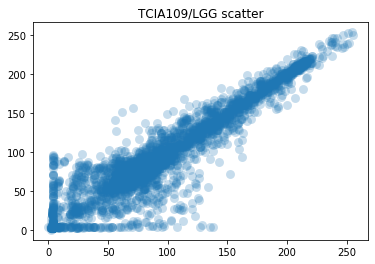

In [29]:
plt.title('TCIA109/LGG scatter')
plt.scatter(image_colsres.T[0],image_colsres.T[1],**plot_kwds)
#plt.scatter(*image_colsres.T[0],image_colsres.T[1],**plot_kwds)
#y,x = np.indices(image_cols.shape[:2])
#plt.scatter(x,y,**plot_kwds)

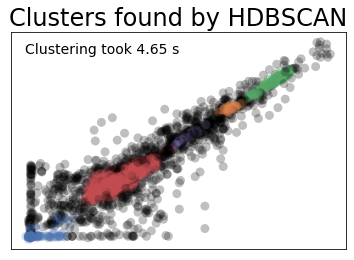

In [32]:
plot_clusters(image_cols, hdbs.HDBSCAN, (), {'min_cluster_size':30, 'min_samples':None,'gen_min_span_tree':True,'approx_min_span_tree':True})
#plot_clusters(image_cols, cluster.KMeans, (), {'n_clusters':6,'n_init': 30})
#plot_clusters(image_cols, cluster.MeanShift, (0.175,), {'cluster_all':False,'bin_seeding':True, 'min_bin_freq':1 })
#plot_clusters(image_colsres, cluster.SpectralClustering, (), {'n_clusters':6})


In [ ]:
#plot_clusters(image_cols, cluster.DBSCAN, (), {'eps':10, 'min_samples':20,'metric':'euclidean'})
plot_clusters(image_cols, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

In [ ]:
#thresholding using opencv2
#hdbreread= sitk.GetImageFromArray(fl_resnorm)
#img = cv2.medianBlur(fl_resnorm,5).astype('uint8')
#img = cv2.medianBlur(fl_res,5).astype('uint8')
#img = cv2.medianBlur(segmented_image,5).astype('uint8')
img = cv2.medianBlur(dbsegmented_image,5).astype('uint8')
#img = segmented_image.astype('uint8')
#global thresh 160

threshval = 150
th1 = cv2.threshold(img,threshval,255,cv2.THRESH_BINARY)[1]


#adaptive thresh
#th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
#            cv2.THRESH_BINARY,11,2)
#adaptive gaussian
#th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            cv2.THRESH_BINARY,11,2)

#titles = ['Original Image', 'Global Thresholding (v = 127)',
#            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
#images = [img, th1, th2, th3]

#for i in range(4):
#    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
#    plt.title(titles[i])
#    plt.xticks([]),plt.yticks([])
plt.title('global thresh')
plt.xticks([]),plt.yticks([])
plt.imshow(th1,'gray')



In [ ]:
th1flatt=th1.flatten()

In [ ]:
#with open('/home/omar/Desktop/cminitialtumorhdbscan','w') as f:
cmth = ConfusionMatrix(segarreshap,th1flatt)
print(cmth.print_stats())
#print(cm.print_stats(),file=f)
#if th1.all() == masknorm.all():
#   print('ventricles are highlighted')

In [ ]:
#from scipy import stats
#th1mode = stats.mode(th1)
#print(th1mode)

In [ ]:
np.count_nonzero(th1flatt)

In [ ]:
threshmax = th1flatt.max()

In [ ]:
th1flatt.min()

In [ ]:
if th1flatt.max() == 0:
    threshval = 150
    th2 = cv2.threshold(img,threshval,255,cv2.THRESH_BINARY)[1]
    plt.title('global thresh with threshval')
    plt.xticks([]),plt.yticks([])
    plt.imshow(th2,'gray')
else: 
    print("thresholding either did not take place or thresholding went well ")

In [ ]:
th1.min()

In [ ]:
plt.imshow(th1,interpolation="nearest",cmap=plt.cm.gray)
th1flat = th1.flatten()
segarreshap

In [ ]:
contournorm = th1
normcopy = fl_resnorm

In [ ]:
# find contours in the thresholded image
cnts = cv2.findContours(contournorm.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#sd = ShapeDetector()
screenCnt = None

In [ ]:
# loop over our contours
for c in cnts:
	# approximate the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.015 * peri, True)
 
	# if our approximated contour has four points, then
	# we can assume that we have found our screen
	if len(approx) > 1:
		screenCnt = approx
		break
        

In [ ]:
cv2.drawContours(normcopy, [screenCnt], -1, (0, 255, 0), 3)
plt.imshow(normcopy,cmap=plt.cm.gray)
#plt.savefig("/home/omar/Documents/Results/normalbrain/ventricles.jpg")
cv2.waitKey(0)

In [ ]:
if screenCnt.any() <= 255:
    print("normal brain,some areas may appear brighter due to contrast")
else:
    print("brain contains a tumor")

In [ ]:
# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
 
	# draw the contour and center of the shape on the image
	cv2.drawContours(fl_resnorm, [c], -1, (0, 255, 0), 2)
	cv2.circle(fl_resnorm, (cX, cY), 7, (255, 255, 255), -1)
	#cv2.putText(fl_resnorm, "", (cX - 20, cY - 20),
		#cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2
 
	# show the image
	plt.imshow(fl_resnorm)
	cv2.waitKey(0)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(segarreshap,dbflat)
#cm = confusion_matrix(segarreshap,th1flatt)
#plt.figure(figsize=(30, 30))
#plt.figure(1)
sns.set()
plt.figure(figsize =(10,5))
sns.heatmap(cm, annot=True, fmt='d' , cmap="Blues")
#plt.axes.set_ylim(5,5)
plt.title('Initial confusion matrix calculated from hdbscan TCIA312 ')
plt.show()
#plt.savefig("/home/omar/Documents/initialdbscancm.jpg")

In [ ]:
from sklearn.utils.linear_assignment_ import linear_assignment

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]
plt.figure(figsize =(10,5))
sns.heatmap(cm2,annot=True, fmt='d', cmap="Blues")
plt.title('Reordering confusion matrix columns so that sum of diagonal values is maximal ')
plt.show()

In [ ]:
cmacc = np.trace(cm)/np.sum(cm)
print('Accuracy obtained from initial confusion matrix:', cmacc)

In [ ]:
cm2acc = np.trace(cm2)/np.sum(cm2)
print('Accuracy based on the reordered confusion matrix:', cm2acc)

In [ ]:
FP = cm2.sum(axis=0) - np.diag(cm2)  
FN = cm2.sum(axis=1) - np.diag(cm2)
TP = np.diag(cm2)
TN = cm2.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
print('TPR',TPR)
#print('TNR',TNR)
#print('PPV',PPV)
#print('NPV',NPV)
print('FPR',FPR)
#print('FNR',FNR)
#print('FDR',FDR)
print('ACC',ACC)

In [ ]:
print('Accuracy score',metrics.accuracy_score(segarreshap,th1flat))

In [ ]:
g = sns.clustermap(segarr)

In [ ]:
#reader = sitk.ImageFileReader()
#reader.SetImageIO("JPEGImageIO")
#reader.SetFileName('/home/omar/Documents/hdbscan.jpg')
#image = reader.Execute()
#hdbreread = sitk.ReadImage('/home/omar/Documents/hdbscan.jpg')
# triangle,huang,maxentropy,otsu,binarythreshold,yen,RenyiEntropy,
hdbreread= sitk.GetImageFromArray(fl_resnorm)
threshold_filter = sitk.OtsuThresholdImageFilter()
threshold_filter.SetInsideValue(0)
threshold_filter.SetOutsideValue(1)
threshold_image = threshold_filter.Execute(hdbreread)
threshold_value = threshold_filter.GetThreshold()
threshold_value = 200
threshold_image = normaltest>threshold_value
plt.title('otsu threshold result')
#plt.grid(None)
plt.imshow(threshold_image,interpolation="nearest",cmap=plt.cm.gray)
#plt.savefig("/home/omar/Documents/Results/normalbrain/otsuthreshold_42.jpg")


In [ ]:
dbhm = sns.clustermap(dbsegmented_image)

In [ ]:
thhm = sns.clustermap(th1)

In [ ]:
from skimage import measure
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = measure.compare_ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()


In [ ]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", segarr), ("dbseg", dbsegmented_image), ("global threshold",th1)
 
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
#	while i<7:
#		plt.savefig('/home/omar/Documents/hdbsegcomparison {0}.jpg')
#		i+1
#show the figure
plt.show()

# compare the images
compare_images(segarr, dbsegmented_image, "original seg vs dbseg")
compare_images(segarr, segarr, "original seg vs original seg")
compare_images(segarr, th1, "original seg vs thresh seg")

#plt.savefig("/home/omar/Documents/hdbsegcomparison.jpg")

In [ ]:
s

In [ ]:
#from scipy.spatial import distance_matrix
#origdm = distance_matrix(image_cols,dbsegmented_image)
from sklearn.metrics import pairwise_distances
#vecorig=image_cols.flatten()
origdm = pairwise_distances(image_cols)

In [ ]:
#from sklearn.metrics import pairwise_distances
#pwd = pairwise_distances(image_cols,metric='euclidean')


In [ ]:
#from skbio.stats.distance import DissimilarityMatrix
#dm = pwd
#pwd

In [ ]:
#fig = dm.plot(cmap='Reds', title='aggloheatmap')